# Connecting Python to SQLite


In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Agtech_database.db')

# Load each table into a DataFrame
# Table name is retried from schema document
plant_df = pd.read_sql_query("SELECT * FROM Plant", conn)
soil_texture_df = pd.read_sql_query("SELECT * FROM SoilTextureLookup", conn)
ph_range_df = pd.read_sql_query("SELECT * FROM PHRangeLookup", conn)
organic_matter_df = pd.read_sql_query("SELECT * FROM OrganicMatterLookup", conn)
salinity_df = pd.read_sql_query("SELECT * FROM SalinityLookup", conn)
zone_df = pd.read_sql_query("SELECT * FROM PlantHardinessZoneLookup", conn)
humidity_df = pd.read_sql_query("SELECT * FROM HumidityLookup", conn)
plant_type_df = pd.read_sql_query("SELECT * FROM PlantTypeLookup", conn)
plant_variety_df = pd.read_sql_query("SELECT * FROM PlantVariety", conn)

# Close the connection
conn.close()


# Create Dataset in csv format by merging multiple dataframes


In [ ]:

# Merge the data frames and create a dataset
# Used the foreign key and primary key information to merge on a specifc feature between data frames
merged_df = pd.merge(plant_df, plant_variety_df, on='PlantID', how='inner')
merged_df = pd.merge(merged_df, plant_type_df, on='PlantTypeID', how='inner')
merged_df = pd.merge(merged_df, humidity_df, on='HumidityID', how='inner')
zone_df['ZoneID'] = zone_df['ZoneID'].astype(str).str[:-1].astype(float)
merged_df = pd.merge(merged_df, zone_df, on='ZoneID', how='inner')
merged_df = pd.merge(merged_df, salinity_df, on='SalinityLevelID', how='inner')
merged_df = pd.merge(merged_df, organic_matter_df, on='OrganicMatterID', how='inner')
merged_df = pd.merge(merged_df, ph_range_df, on='PHRangeID', how='inner', suffixes=('_merged', '_ph'))
merged_df = pd.merge(merged_df, soil_texture_df, on='SoilTextureID', how='inner')


# Removing columns that are redundant and those are not useful


In [ ]:


# Remove columns with 'ID' in their name
columns_to_drop = [col for col in merged_df.columns if 'ID' in col]
merged_df = merged_df.drop(columns=columns_to_drop)
columns_to_drop = [col for col in merged_df.columns if 'Description' in col]
merged_df = merged_df.drop(columns=columns_to_drop)
if 'ImpactonPlants_x' in merged_df.columns:
  merged_df = merged_df.drop('ImpactonPlants_x', axis=1)
if 'ImpactonPlants_y' in merged_df.columns:
  merged_df = merged_df.drop('ImpactonPlants_y', axis=1)
if 'ImportanceToSoilAndPlants' in merged_df.columns:
  merged_df = merged_df.drop('ImportanceToSoilAndPlants', axis=1)
if 'HumidityLevelLow' in merged_df.columns:
  merged_df = merged_df.drop('HumidityLevelLow', axis=1)
if 'HumidityLevelHigh' in merged_df.columns:
  merged_df = merged_df.drop('HumidityLevelHigh', axis=1)
if 'SalinityLevel' in merged_df.columns:
  merged_df = merged_df.drop('SalinityLevel', axis=1)
if 'PHRange' in merged_df.columns:
  merged_df = merged_df.drop('PHRange', axis=1)

merged_df = merged_df.rename(columns={'Classification_y': 'salinity', 'Classification_x': 'humidity'})
if 'PlantVarietyName' in merged_df.columns:
  merged_df = merged_df.drop('PlantVarietyName', axis=1)


from sklearn.preprocessing import OrdinalEncoder



In [ ]:
merged_df.head()

,PlantName,PlantType,humidity,Zone,TemperatureStartRange,TemperatureEndRange,salinity,OrganicMatterContent,SoilType,SoilTexture
0,Lettuce,Vegetable,Moderate,10A,30,35,Non-Saline,Moderate (2% - 4%),Slightly Acidic,Loamy Soil
1,Lettuce,Vegetable,Moderate,10B,35,40,Non-Saline,Moderate (2% - 4%),Slightly Acidic,Loamy Soil
2,Lettuce,Vegetable,Moderate,10A,30,35,Non-Saline,Moderate (2% - 4%),Slightly Acidic,Loamy Soil
3,Lettuce,Vegetable,Moderate,10B,35,40,Non-Saline,Moderate (2% - 4%),Slightly Acidic,Loamy Soil
4,Lettuce,Vegetable,Moderate,10A,30,35,Non-Saline,Moderate (2% - 4%),Slightly Acidic,Loamy Soil


# Analysing the features with respect to Plant Type

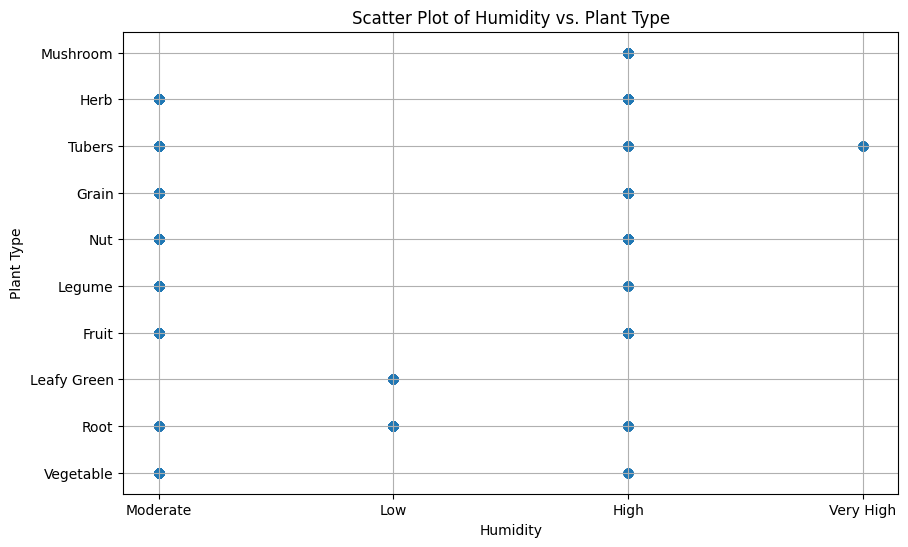

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['humidity'], merged_df['PlantType'])
plt.xlabel('Humidity')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Humidity vs. Plant Type')
plt.grid(True)
plt.show()

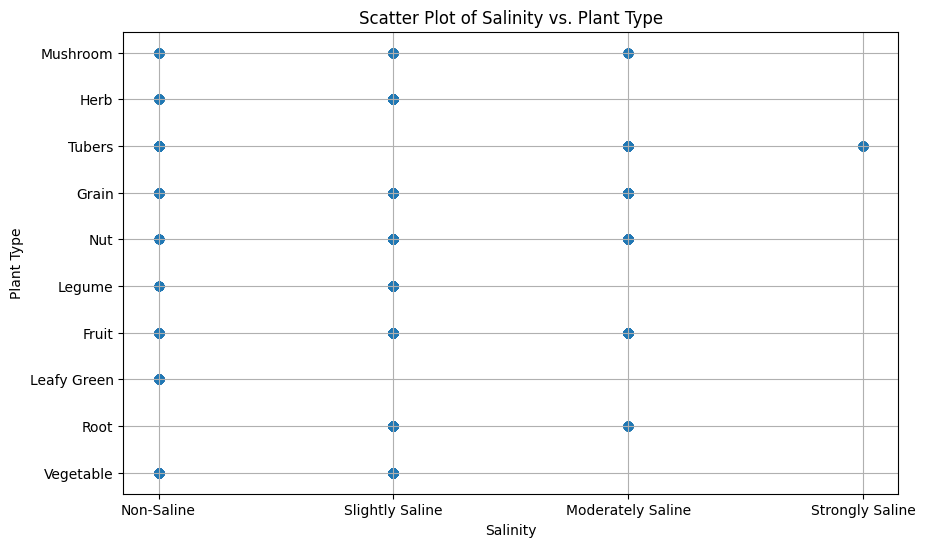

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['salinity'], merged_df['PlantType'])
plt.xlabel('Salinity')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Salinity vs. Plant Type')
plt.grid(True)
plt.show()

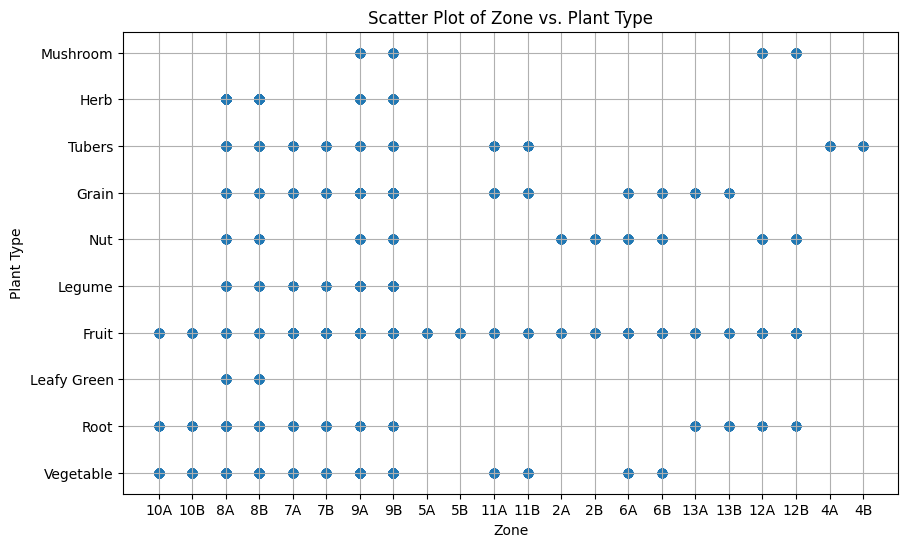

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['Zone'], merged_df['PlantType'])
plt.xlabel('Zone')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Zone vs. Plant Type')
plt.grid(True)
plt.show()

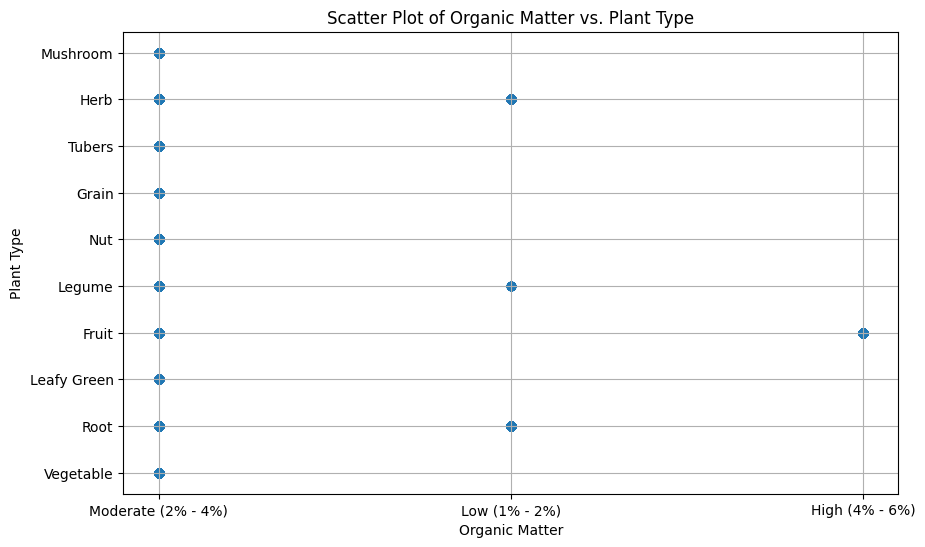

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['OrganicMatterContent'], merged_df['PlantType'])
plt.xlabel('Organic Matter')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Organic Matter vs. Plant Type')
plt.grid(True)
plt.show()

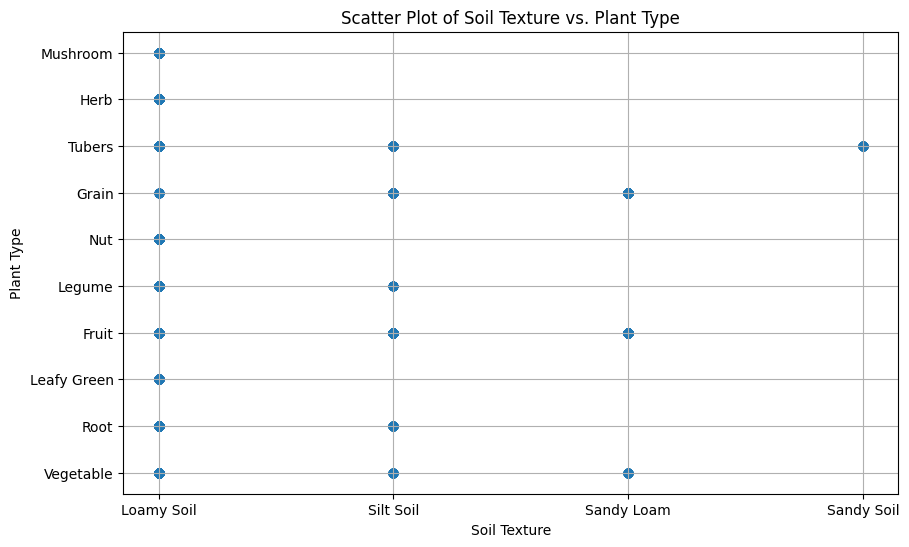

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['SoilTexture'], merged_df['PlantType'])
plt.xlabel('Soil Texture')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Soil Texture vs. Plant Type')
plt.grid(True)
plt.show()

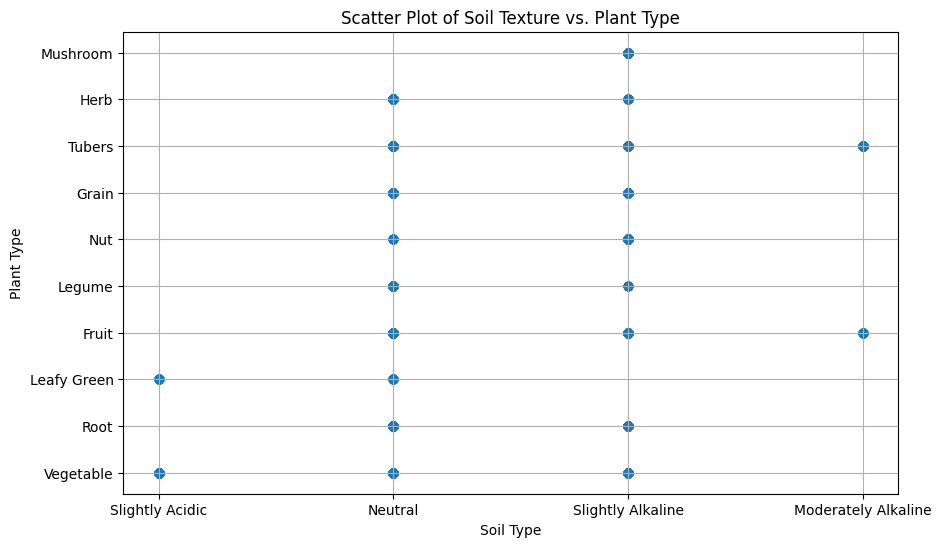

In [ ]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(merged_df['SoilType'], merged_df['PlantType'])
plt.xlabel('Soil Type')
plt.ylabel('Plant Type')
plt.title('Scatter Plot of Soil Texture vs. Plant Type')
plt.grid(True)
plt.show()

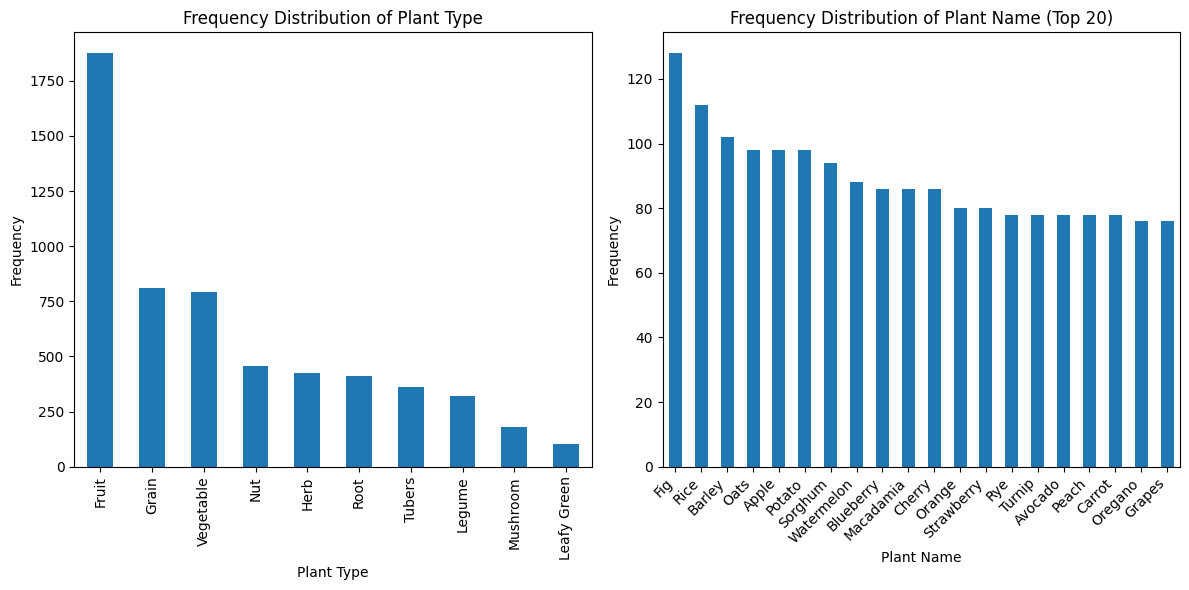

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
plant_type_counts = merged_df['PlantType'].value_counts()

# Calculate frequency distribution for 'PlantName'
plant_name_counts = merged_df['PlantName'].value_counts()

# Plot frequency distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plant_type_counts.plot(kind='bar')
plt.title('Frequency Distribution of Plant Type')
plt.xlabel('Plant Type')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plant_name_counts.head(20).plot(kind='bar') # Plotting only the top 20 for better visualization
plt.title('Frequency Distribution of Plant Name (Top 20)')
plt.xlabel('Plant Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability


plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
#Ordinal Encoding for Plant Type
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'plantType' column
merged_df['PlantType'] = ordinal_encoder.fit_transform(merged_df[['PlantType']])

In [ ]:
#Print unique values
# Iterate through columns and print unique values, excluding specified columns
for column in merged_df.columns:
  if column not in ['PlantName', 'TemperatureStartRange', 'TemperatureEndRange']:
    unique_values = merged_df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'PlantType': [9. 7. 3. 0. 4. 6. 1. 8. 2. 5.]
Unique values for column 'humidity': ['Moderate' 'Low' 'High' 'Very High']
Unique values for column 'Zone': ['10A' '10B' '8A' '8B' '7A' '7B' '9A' '9B' '5A' '5B' '11A' '11B' '2A' '2B'
 '6A' '6B' '13A' '13B' '12A' '12B' '4A' '4B']
Unique values for column 'salinity': ['Non-Saline' 'Slightly Saline' 'Moderately Saline' 'Strongly Saline']
Unique values for column 'OrganicMatterContent': ['Moderate (2% - 4%)' 'Low (1% - 2%)' 'High (4% - 6%)']
Unique values for column 'SoilType': ['Slightly Acidic' 'Neutral' 'Slightly Alkaline' 'Moderately Alkaline']
Unique values for column 'SoilTexture': ['Loamy Soil' 'Silt Soil' 'Sandy Loam' 'Sandy Soil']


In [ ]:
#ordinal Encoding
humidity_mapping = {'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}
salinity_mapping = {'Non-Saline': 1, 'Slightly Saline': 2, 'Moderately Saline': 3, 'Strongly Saline': 4}
organic_matter_mapping = {'Low (1% - 2%)': 1, 'Moderate (2% - 4%)': 2, 'High (4% - 6%)': 3}
soil_type_mapping = {'Slightly Acidic': 1, 'Neutral': 2, 'Slightly Alkaline': 3, 'Moderately Alkaline': 4}
soil_texture_mapping = {'Sandy Soil': 1, 'Sandy Loam': 2, 'Loamy Soil': 3, 'Silt Soil': 4}

# Assuming 'merged_df' is defined as in your previous code

# Encoding categorical features using the provided mappings
merged_df['humidity'] = merged_df['humidity'].map(humidity_mapping)
merged_df['salinity'] = merged_df['salinity'].map(salinity_mapping)
merged_df['OrganicMatterContent'] = merged_df['OrganicMatterContent'].map(organic_matter_mapping)
merged_df['SoilType'] = merged_df['SoilType'].map(soil_type_mapping)
merged_df['SoilTexture'] = merged_df['SoilTexture'].map(soil_texture_mapping)


# Print the updated DataFrame to verify the changes
print(merged_df.head())

  PlantName  PlantType  humidity Zone  TemperatureStartRange  \
0   Lettuce        9.0         2  10A                     30   
1   Lettuce        9.0         2  10B                     35   
2   Lettuce        9.0         2  10A                     30   
3   Lettuce        9.0         2  10B                     35   
4   Lettuce        9.0         2  10A                     30   

   TemperatureEndRange  salinity  OrganicMatterContent  SoilType  SoilTexture  
0                   35         1                     2         1            3  
1                   40         1                     2         1            3  
2                   35         1                     2         1            3  
3                   40         1                     2         1            3  
4                   35         1                     2         1            3  


In [ ]:
# Alternative approach to encode categorical features using replace()
merged_df.replace({
    'humidity': {'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4},
    'salinity': {'Non-Saline': 1, 'Slightly Saline': 2, 'Moderately Saline': 3, 'Strongly Saline': 4},
    'OrganicMatterContent': {'Low (1% - 2%)': 1, 'Moderate (2% - 4%)': 2, 'High (4% - 6%)': 3},
    'SoilType': {'Slightly Acidic': 1, 'Neutral': 2, 'Slightly Alkaline': 3, 'Moderately Alkaline': 4},
    'SoilTexture': {'Sandy Soil': 1, 'Sandy Loam': 2, 'Loamy Soil': 3, 'Silt Soil': 4}
}, inplace=True)

# Print the updated DataFrame to verify the changes
print(merged_df.head())


  PlantName  PlantType  humidity Zone  TemperatureStartRange  \
0   Lettuce        9.0         2  10A                     30   
1   Lettuce        9.0         2  10B                     35   
2   Lettuce        9.0         2  10A                     30   
3   Lettuce        9.0         2  10B                     35   
4   Lettuce        9.0         2  10A                     30   

   TemperatureEndRange  salinity  OrganicMatterContent  SoilType  SoilTexture  
0                   35         1                     2         1            3  
1                   40         1                     2         1            3  
2                   35         1                     2         1            3  
3                   40         1                     2         1            3  
4                   35         1                     2         1            3  


In [ ]:
#Custom encoding to convert strings to float
def map_zone_to_numerical(zone_str):
  """Maps zone strings (e.g., '10A', '8B') to numerical values."""
  if not zone_str:
    return None  # Handle empty or missing values

  try:
    zone_num = float(zone_str[:-1])  # Extract the numeric part
    return zone_num
  except ValueError:
    return None  # Handle invalid zone strings

# Apply the mapping function to the 'Zone' column
merged_df['Zone'] = merged_df['Zone'].apply(map_zone_to_numerical)

# Print the updated DataFrame to verify the changes
print(merged_df.head())

  PlantName  PlantType  humidity  Zone  TemperatureStartRange  \
0   Lettuce        9.0         2  10.0                     30   
1   Lettuce        9.0         2  10.0                     35   
2   Lettuce        9.0         2  10.0                     30   
3   Lettuce        9.0         2  10.0                     35   
4   Lettuce        9.0         2  10.0                     30   

   TemperatureEndRange  salinity  OrganicMatterContent  SoilType  SoilTexture  
0                   35         1                     2         1            3  
1                   40         1                     2         1            3  
2                   35         1                     2         1            3  
3                   40         1                     2         1            3  
4                   35         1                     2         1            3  


# SCALING


In [ ]:
# prompt: can you apply standrad scaler to all the featues except for plant name

from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df' is defined as in your previous code

# Separate the 'PlantName' column
plant_names = merged_df['PlantName']

# Create a copy of the DataFrame without the 'PlantName' column
df_for_scaling = merged_df.drop('PlantName', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the DataFrame (excluding 'PlantName')
scaled_features = scaler.fit_transform(df_for_scaling)

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df_for_scaling.columns)

# Add the 'PlantName' column back to the scaled DataFrame
scaled_df['PlantName'] = plant_names

# Now 'scaled_df' contains all the features except 'PlantName' scaled using StandardScaler

In [ ]:
# prompt: import keras


# Neural Network Model

*   Used Grid search to tune the hyperparams



In [ ]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Prepare your data
X = scaled_df.drop('PlantName', axis=1)  # Features
y = scaled_df['PlantName']  # Target variable (assuming 'PlantName' is your target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target labels (plant names) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)


# Build a simple neural network model with L2 regularization
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.004)),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_train, y_train_encoded)
print(f"Training accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1451 - loss: 4.3200 - val_accuracy: 0.4521 - val_loss: 2.8673
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4824 - loss: 2.4877 - val_accuracy: 0.5675 - val_loss: 1.7822
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 1.6624 - val_accuracy: 0.6710 - val_loss: 1.4147
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 1.3658 - val_accuracy: 0.6634 - val_loss: 1.2553
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 1.2246 - val_accuracy: 0.6797 - val_loss: 1.1695
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6896 - loss: 1.1372 - val_accuracy: 0.6874 - val_loss: 1.0982
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 1.0638 - val_accuracy: 0.6917 - val_loss: 1.0485
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 1.0291 - val_accuracy: 0.6765

# PLOTs

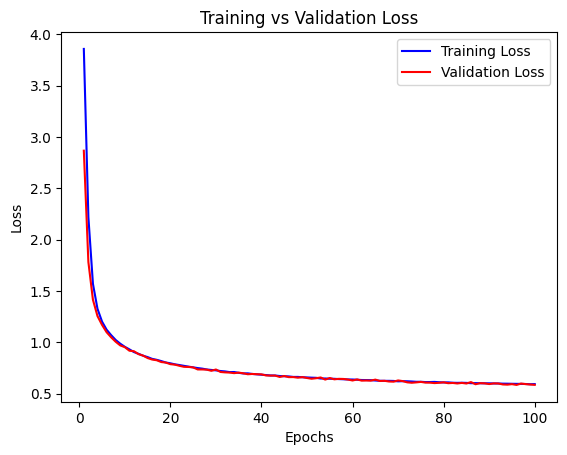

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for the loss values
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='red')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plot
plt.show()

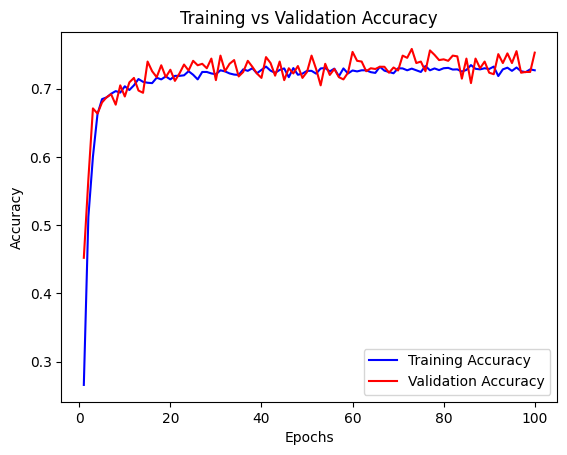

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a plot for the accuracy values
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', color='red')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

# Model Evaluation

In [ ]:

from sklearn.metrics import recall_score, f1_score, precision_score
import numpy as np

# Evaluate the best model on the test set

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {accuracy}")

# Assuming y_test_encoded and model are defined from the previous code
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
recall = recall_score(y_test_encoded, y_pred, average='weighted')  # Use 'weighted' for multi-class
precision = precision_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7204 - loss: 0.6222 
Test accuracy: 0.7308362126350403
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Recall: 0.730836236933798
Precision: 0.6291149560029491
F1 Score: 0.6582413126455114


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Dump the model to disk for later inference

In [ ]:
from sklearn.preprocessing import LabelEncoder

import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl', 'wb') as scaler_f:
    pickle.dump(scaler, scaler_f)
with open('ordinal_enc.pkl', 'wb') as ordinal_f:
    pickle.dump(ordinal_encoder, ordinal_f)
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
with open('label_enc.pkl', 'wb') as label_f:
    pickle.dump(label_encoder, label_f)
with open('x_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)